In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize

In [3]:
np.random.seed(37)

In [4]:
base = pd.read_csv(r"C:\Users\tancr\Downloads\ml-100k\ml-100k\ua.base", sep='\t', names = ["user_id", "movie_id", "ratings", "timestamp"])

In [5]:
test = pd.read_csv(r"C:\Users\tancr\Downloads\ml-100k\ml-100k\ua.test", sep='\t', names = ["user_id", "movie_id", "ratings", "timestamp"])

In [6]:
test

,user_id,movie_id,ratings,timestamp
0,1,20,4,887431883
1,1,33,4,878542699
2,1,61,4,878542420
3,1,117,3,874965739
4,1,155,2,878542201
...,...,...,...,...
9425,943,232,4,888639867
9426,943,356,4,888639598
9427,943,570,1,888640125
9428,943,808,4,888639868


In [7]:
matrix_base = base.pivot(values='ratings', index='user_id', columns='movie_id')
matrix_base

movie_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,2.0,NaN,NaN,4.0,5.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
matrix_test = test.pivot(values='ratings', index='user_id', columns='movie_id')
matrix_test

movie_id,1,2,3,4,5,6,7,8,9,10,...,1591,1592,1600,1612,1617,1646,1653,1656,1662,1664
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
matrix_test = matrix_test.drop([1582, 1653], axis = 1)

In [10]:
m_base = np.array(matrix_base)
m_test = np.array(matrix_test)

In [11]:
m_base = np.nan_to_num(m_base, nan = -1)
m_test = np.nan_to_num(m_test, nan = -1)


m_base = m_base.astype(int)
m_test = m_test.astype(int)

In [85]:
num_Zx = 5
num_Zp = 10
num_ZR = 3
num_pref_levels = 2

In [86]:
P_Zx = np.random.dirichlet(np.ones(num_Zx), size=1)[0]
P_x_given_Zx = np.random.dirichlet(np.ones(m_base.shape[1]), size=num_Zx)
P_Zp_given_y = np.random.dirichlet(np.ones(num_Zp), size=m_base.shape[0])
P_ZR_given_y = np.random.dirichlet(np.ones(num_ZR), size=m_base.shape[0])
P_Zpref_given_Zp_Zx = np.random.dirichlet(np.ones(num_pref_levels), size=(num_Zp, num_Zx))
P_r_given_ZR_Zpref = np.random.dirichlet(np.ones(m_base.max()), size=(num_ZR, num_pref_levels))

In [14]:
P_r_given_ZR_Zpref.shape

(3, 2, 5)

In [15]:
def e_step(data, P_Zx, P_x_given_Zx, P_Zp_given_y, P_ZR_given_y, P_Zpref_given_Zp_Zx, P_r_given_ZR_Zpref):

    num_users, num_items = data.shape

    posteriors = np.zeros((num_users, num_items, num_Zp, num_ZR, num_Zx, num_pref_levels))

    for i in range(num_users):
        for j in range(num_items):
            if data[i, j] != -1:  # Only consider rated items
                for zp in range(num_Zp):
                    for zR in range(num_ZR):
                        for zx in range(num_Zx):
                            for zpref in range(num_pref_levels):  # Preference levels
                                posteriors[i, j, zp, zR, zx, zpref] = (
                                    P_Zx[zx] * P_x_given_Zx[zx, j] *
                                    P_Zp_given_y[i, zp] * P_ZR_given_y[i, zR] *
                                    P_Zpref_given_Zp_Zx[zp, zx, zpref] *
                                    P_r_given_ZR_Zpref[zR, zpref, data[i, j] - 1]  # -1 to index from 0
                                )
                posteriors[i, j] /= np.sum(posteriors[i, j]) # Normalize

    return posteriors

In [16]:
r = e_step(m_base, P_Zx, P_x_given_Zx, P_Zp_given_y, P_ZR_given_y, P_Zpref_given_Zp_Zx, P_r_given_ZR_Zpref)

In [25]:
r.shape

(943, 1680, 10, 3, 5, 2)

In [33]:
def m_step(data, posteriors):

    L = np.sum(data != -1)

    num_users, num_items = data.shape
    num_Zp, num_ZR, num_Zx, num_pref_levels = posteriors.shape[2:]

    P_Zx = np.zeros(num_Zx)
    P_x_given_Zx = np.zeros((num_Zx, num_items))
    P_Zp_given_y = np.zeros((num_users, num_Zp))
    P_ZR_given_y = np.zeros((num_users, num_ZR))
    P_Zpref_given_Zp_Zx = np.zeros((num_Zp, num_Zx, num_pref_levels))
    P_r_given_ZR_Zpref = np.zeros((num_ZR, num_pref_levels, data.max()))

    for zx in range(num_Zx):
        P_Zx[zx] = np.sum(posteriors[:, :, :, :, zx, :])

    P_Zx /= L

    for zx in range(num_Zx):
        for j in range(num_items):
            P_x_given_Zx[zx, j] = np.sum(posteriors[:, j, :, :, zx, :])
        P_x_given_Zx[zx] /= (L * P_Zx[zx])

    for i in range(num_users):
        for zp in range(num_Zp):
            P_Zp_given_y[i, zp] = np.sum(posteriors[i, :, zp, :, :, :])
        P_Zp_given_y[i] /= np.sum(P_Zp_given_y[i])

    for i in range(num_users):
        for zR in range(num_ZR):
            P_ZR_given_y[i, zR] = np.sum(posteriors[i, :, :, zR, :, :])
        P_ZR_given_y[i] /= np.sum(P_ZR_given_y[i])

    for zp in range(num_Zp):                           
        for zx in range(num_Zx):
            for zpref in range(num_pref_levels):
                P_Zpref_given_Zp_Zx[zp, zx, zpref] = np.sum(posteriors[:, :, zp, :, zx, zpref])
    P_Zpref_given_Zp_Zx /= np.sum(P_Zpref_given_Zp_Zx, axis=2, keepdims=True)

    for zR in range(num_ZR):
        for zpref in range(num_pref_levels):
            for r in range(data.max()):
                P_r_given_ZR_Zpref[zR, zpref, r] = np.sum(posteriors[data == r + 1][:, :, zR, :, zpref])
    P_r_given_ZR_Zpref /= P_r_given_ZR_Zpref.sum(axis=2, keepdims=True)

    return P_Zx, P_x_given_Zx, P_Zp_given_y, P_ZR_given_y, P_Zpref_given_Zp_Zx, P_r_given_ZR_Zpref


In [88]:
def compute_log_likelihood(user_item_matrix, P_Zx, P_x_given_Zx, P_Zp_given_y, P_ZR_given_y, P_Zpref_given_Zp_Zx, P_r_given_ZR_Zpref, Zp_size, ZR_size, Zx_size):

    
    num_users, num_items = user_item_matrix.shape
    log_likelihood = 0.0

    
    
    for y in range(num_users):
        for x in range(num_items):
            r = user_item_matrix[y, x]
            if r != -1:
                prob = 0.0
                for zp in range(Zp_size):
                    for zr in range(ZR_size):
                        for zx in range(Zx_size):
                            for zpref in range(2):
                                prob += (
                                    P_Zx[zx] * 
                                    P_x_given_Zx[zx, x] * 
                                    P_Zp_given_y[y, zp] * 
                                    P_ZR_given_y[y, zr] * 
                                    P_Zpref_given_Zp_Zx[zp, zx, zpref] * 
                                    P_r_given_ZR_Zpref[zr, zpref, r - 1]
                                )
                log_likelihood += np.log(prob)
    
    return log_likelihood

In [80]:
log_likelihood(m_base, a, b, c, d, e, f, num_Zp, num_ZR, num_Zx )

-744134.0279931735

In [89]:
def fit(user_item_matrix, P_Zx, P_x_given_Zx, P_Zp_given_y, P_ZR_given_y, P_Zpref_given_Zp_Zx, P_r_given_ZR_Zpref, Zp_size, ZR_size, Zx_size, max_iter=100):

    log_likelihoods = []

    for i in range(max_iter):
        posterior = e_step(user_item_matrix, P_Zx, P_x_given_Zx, P_Zp_given_y, P_ZR_given_y, P_Zpref_given_Zp_Zx, P_r_given_ZR_Zpref)
        P_Zx, P_x_given_Zx, P_Zp_given_y, P_ZR_given_y, P_Zpref_given_Zp_Zx, P_r_given_ZR_Zpref = m_step(user_item_matrix, posterior)
        log_likelihood = compute_log_likelihood(user_item_matrix, P_Zx, P_x_given_Zx, P_Zp_given_y, P_ZR_given_y, P_Zpref_given_Zp_Zx, P_r_given_ZR_Zpref, Zp_size, ZR_size, Zx_size)
        log_likelihoods.append(log_likelihood)
        print(f'{i=}', f'{log_likelihood=}')

    return P_Zx, P_x_given_Zx, P_Zp_given_y, P_ZR_given_y, P_Zpref_given_Zp_Zx, P_r_given_ZR_Zpref, log_likelihoods

In [90]:
p1, p2, p3, p4, p5, p6, l = fit(m_base, P_Zx, P_x_given_Zx, P_Zp_given_y, P_ZR_given_y, P_Zpref_given_Zp_Zx, P_r_given_ZR_Zpref, num_Zp, num_ZR, num_Zx)

i=0 log_likelihood=-743558.4399724032
i=1 log_likelihood=-742216.8838423333
i=2 log_likelihood=-741263.2054692677
i=3 log_likelihood=-740397.0898764797
i=4 log_likelihood=-739587.9636556017
i=5 log_likelihood=-738862.0266896738
i=6 log_likelihood=-738243.7485195243
i=7 log_likelihood=-737738.0661650727
i=8 log_likelihood=-737332.2366191319
i=9 log_likelihood=-737005.2980754592
i=10 log_likelihood=-736735.8855404835
i=11 log_likelihood=-736505.7347354896
i=12 log_likelihood=-736300.2697196857
i=13 log_likelihood=-736108.0878620718
i=14 log_likelihood=-735920.2923521795
i=15 log_likelihood=-735729.9271224408
i=16 log_likelihood=-735531.5649716834
i=17 log_likelihood=-735321.1421595418
i=18 log_likelihood=-735096.1204525765
i=19 log_likelihood=-734855.7476157383
i=20 log_likelihood=-734600.8179420814
i=21 log_likelihood=-734332.8279545546
i=22 log_likelihood=-734053.4469376629
i=23 log_likelihood=-733765.1897757822
i=24 log_likelihood=-733472.306462981
i=25 log_likelihood=-733179.27905840

In [93]:
p7, p8, p9, p10, p11, p12, l2 = fit(m_base, p1, p2, p3, p4, p5, p6, num_Zp, num_ZR, num_Zx)

i=0 log_likelihood=-722034.2116180164
i=1 log_likelihood=-721993.7195454765
i=2 log_likelihood=-721954.2357196773
i=3 log_likelihood=-721915.7016289133
i=4 log_likelihood=-721878.0548155612
i=5 log_likelihood=-721841.2352545077
i=6 log_likelihood=-721805.1892673486
i=7 log_likelihood=-721769.8684538659
i=8 log_likelihood=-721735.2354085298
i=9 log_likelihood=-721701.2796000264
i=10 log_likelihood=-721668.0266544308
i=11 log_likelihood=-721635.522007059
i=12 log_likelihood=-721603.7917622237
i=13 log_likelihood=-721572.8175144485
i=14 log_likelihood=-721542.5490803147
i=15 log_likelihood=-721512.9301331067
i=16 log_likelihood=-721483.9089275922
i=17 log_likelihood=-721455.4331348911
i=18 log_likelihood=-721427.4447250254
i=19 log_likelihood=-721399.8833869458
i=20 log_likelihood=-721372.6927896852
i=21 log_likelihood=-721345.8244090157
i=22 log_likelihood=-721319.2383778609
i=23 log_likelihood=-721292.9013804724
i=24 log_likelihood=-721266.7815367499
i=25 log_likelihood=-721240.84196115

In [98]:
p13, p14, p15, p16, p17, p18, l3 = fit(m_base, p7, p8, p9, p10, p11, p12, num_Zp, num_ZR, num_Zx)

i=0 log_likelihood=-719400.3163073396
i=1 log_likelihood=-719386.5106729023
i=2 log_likelihood=-719373.2798745946
i=3 log_likelihood=-719360.7659709004
i=4 log_likelihood=-719348.6762857521
i=5 log_likelihood=-719336.8083413639
i=6 log_likelihood=-719325.0893192337
i=7 log_likelihood=-719313.6277134583
i=8 log_likelihood=-719302.4569076014
i=9 log_likelihood=-719291.5058862003
i=10 log_likelihood=-719280.7896191874
i=11 log_likelihood=-719270.3150373022
i=12 log_likelihood=-719259.967619222
i=13 log_likelihood=-719249.7297164457
i=14 log_likelihood=-719239.6974191614
i=15 log_likelihood=-719229.9296394113
i=16 log_likelihood=-719220.4076262199
i=17 log_likelihood=-719211.0561480413
i=18 log_likelihood=-719201.7530087762
i=19 log_likelihood=-719192.3860661378
i=20 log_likelihood=-719183.0920692693
i=21 log_likelihood=-719174.1200001494
i=22 log_likelihood=-719165.4424363319
i=23 log_likelihood=-719156.9583745357
i=24 log_likelihood=-719148.6220487221
i=25 log_likelihood=-719140.41652896

Text(0, 0.5, 'Observed Log Likelihood')

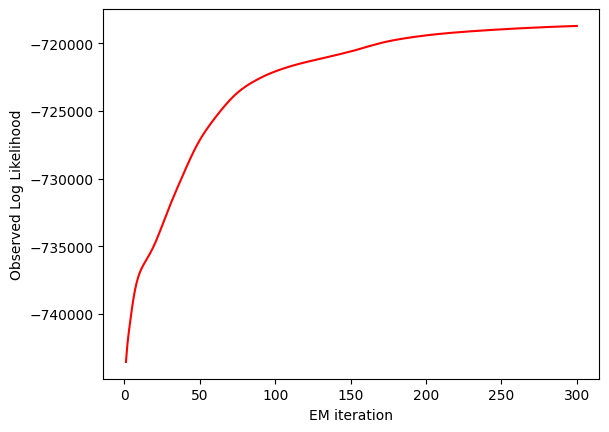

In [114]:
plt.plot(np.arange(1,301), l + l2 + l3, 'r-')
plt.xlabel("EM iteration")
plt.ylabel("Observed Log Likelihood")

In [138]:
def compute_P_iu_r(u, i, r, P_Zx, P_x_given_Zx, P_Zp_given_y, P_ZR_given_y, P_Zpref_given_Zp_Zx, P_r_given_ZR_Zpref, Zp_size, ZR_size, Zx_size):
    prob = 0.0
    for Z_p in range(Zp_size):
        for Z_R in range(ZR_size):
            for Z_x in range(Zx_size):
                for Z_pref in range(2):
                    prob += (
                        P_Zp_given_y[u, Z_p] *
                        P_ZR_given_y[u, Z_R] *
                        P_Zx[Z_x] *
                        P_x_given_Zx[Z_x, i] *
                        P_Zpref_given_Zp_Zx[Z_p, Z_x, Z_pref] *
                        P_r_given_ZR_Zpref[Z_R, Z_pref, r]
                    )
    return prob



In [118]:
P_Zp_given_y.shape

(943, 10)

In [141]:
def predict_rating(u, i, P_Zx, P_x_given_Zx, P_Zp_given_y, P_ZR_given_y, P_Zpref_given_Zp_Zx, P_r_given_ZR_Zpref, Zp_size, ZR_size, Zx_size, num_ratings=5):
    P_iu_r = np.zeros(num_ratings)
    for r in range(num_ratings):
        P_iu_r[r] = compute_P_iu_r(u, i, r, P_Zx, P_x_given_Zx, P_Zp_given_y, P_ZR_given_y, P_Zpref_given_Zp_Zx, P_r_given_ZR_Zpref, Zp_size, ZR_size, Zx_size)

    P_iu_r /= np.sum(P_iu_r)  # Normalize the probabilities

    predicted_rating = np.sum([(r + 1) * P_iu_r[r] for r in range(num_ratings)])
    return predicted_rating

In [125]:
p15.shape

(943, 10)

In [143]:
dic = {}
c = 0
for i in matrix_test.columns:
  dic[c] = i
  c += 1

dic_items_test = dic

In [144]:
dic = {}
c = 0
for i in matrix_base.columns:
  dic[i] = c
  c += 1

dic_items_base = dic

In [145]:
predictions = []


for i in range(m_test.shape[0]):
    
    for j in range(m_test.shape[1]):

        if m_test[i,j] != -1:
            
            item_trans = dic_items_test[j]
            index_item = dic_items_base[item_trans]

            print(i,index_item)

            pred = predict_rating(i, j, p13, p14, p15, p16, p17, p18, 10, 3, 5, num_ratings=5)

            predictions.append(pred)
        


        

0 19
0 32
0 60
0 116
0 154
0 159
0 170
0 188
0 201
0 264
1 12
1 49
1 250
1 279
1 280
1 289
1 291
1 296
1 311
1 313
2 244
2 293
2 322
2 327
2 330
2 331
2 333
2 334
2 336
2 342
3 49
3 259
3 263
3 287
3 293
3 302
3 353
3 355
3 356
3 360
4 0
4 1
4 16
4 97
4 109
4 224
4 362
4 423
4 438
4 453
5 13
5 22
5 68
5 85
5 97
5 257
5 300
5 462
5 491
5 516
6 31
6 162
6 381
6 429
6 454
6 478
6 491
6 496
6 647
6 660
7 21
7 49
7 78
7 88
7 181
7 293
7 337
7 384
7 456
7 549
8 5
8 285
8 297
8 339
8 478
8 486
8 506
8 520
8 526
8 690
9 6
9 15
9 99
9 174
9 284
9 460
9 485
9 487
9 503
9 610
10 37
10 109
10 110
10 226
10 424
10 557
10 722
10 724
10 731
10 739
11 81
11 95
11 96
11 131
11 142
11 171
11 203
11 299
11 470
11 734
12 55
12 97
12 185
12 197
12 214
12 271
12 343
12 359
12 525
12 835
13 21
13 97
13 110
13 173
13 212
13 268
13 356
13 473
13 529
13 708
14 24
14 126
14 221
14 330
14 404
14 472
14 677
14 684
14 748
14 931
15 7
15 54
15 63
15 88
15 177
15 193
15 196
15 208
15 704
15 943
16 0
16 8
16 12
16 116

In [146]:
predictions = np.array(predictions)

In [147]:
len(predictions)

9428

In [148]:
real = m_test[m_test != -1]

In [149]:
np.mean(np.abs(predictions - real))

0.8918380925582198

In [172]:
max_class_Y_p = np.zeros((943, 2), dtype = int)

In [173]:
max_class_Y_r = np.zeros((943, 2), dtype = int)

array([0, 0])

In [152]:
p15.shape

(943, 10)

In [174]:
for i in range(943):
    max_class_Y_p[i,0] = i
    max_class_Y_p[i,1] = np.argmax(p15[i,:])


In [175]:
for i in range(943):
    max_class_Y_r[i,0] = i
    max_class_Y_r[i,1] = np.argmax(p16[i,:])


In [176]:
np.save('max_class_Y_p.npy', max_class_Y_p)
np.save('max_class_Y_r.npy', max_class_Y_r)

In [163]:
def compute_P_Zx_given_x(x, P_Zx, P_x_given_Zx):
    Zx_size = len(P_Zx)
    P_Zx_given_x = np.zeros(Zx_size)

    # Compute the marginal probability P(x)
    P_x = np.sum([P_x_given_Zx[Z_x, x] * P_Zx[Z_x] for Z_x in range(Zx_size)])
    
    # Compute P(Z_x | x) using Bayes' theorem
    for Z_x in range(Zx_size):
        P_Zx_given_x[Z_x] = (P_x_given_Zx[Z_x, x] * P_Zx[Z_x]) / P_x

    return P_Zx_given_x

In [166]:
p14.shape

(5, 1680)

In [165]:
compute_P_Zx_given_x(1,p13, p14)

1.0

In [159]:
P_Zx_given_x = np.zeros((m_base.shape[1], 5))

In [167]:
for i in range(1680):
    prob = compute_P_Zx_given_x(i, p13, p14)
    P_Zx_given_x[i,:] = prob

In [179]:
P_Zx_given_x[1679].sum()

1.0

In [180]:
max_class_x = np.zeros((1680, 2), dtype = int)

In [181]:
for i in range(1680):
    max_class_x[i,0] = i
    max_class_x[i,1] = np.argmax(P_Zx_given_x[i,:])

In [184]:
np.save('max_class_x.npy', max_class_x)